In [ ]:
#Proste mcmc za 
#Florian Hartig, A simple Metropolis-Hastings MCMC in R, Theoretical Ecology

#
#dane które muszą być wcześniej to wektory x i y !!!
#

x<-seq(1,100)
y<-3*x+4+rnorm(100,0,3)
par(bg = "white")
plot(x,y)

In [2]:
#funkcja wiarygodności 
likelihood <- function(param){
    a = param[1]
    b = param[2]
    sd = param[3]
     
    pred = a*x + b
    singlelikelihoods = dnorm(y, mean = pred, sd = sd, log = T)
    sumll = sum(singlelikelihoods)
    return(sumll)   
}


# to jest ważne - rozkład a priori -> co przypuszczamy o parametrach
#tu trzeba będzie zmienić zakres w rozkładach (min i max)
prior <- function(param){
    a = param[1]
    b = param[2]
    sd = param[3]
    aprior = dunif(a, min=0, max=5, log = T)
    bprior = dunif(b, min=-5, max=5, log = T)
    sdprior = dunif(sd, min=0, max=30, log = T)
    return(aprior+bprior+sdprior)
}


#prawd. a posteriori 
posterior <- function(param){
   return (likelihood(param) + prior(param))
}

In [3]:
######## Metropolis algorithm ################

#funkcja propozycji tu ustalamy szerokość przeszukiwania
proposalfunction <- function(param){
    return(rnorm(3,mean = param, sd= c(0.05,0.05,0.05)))
}
 
run_metropolis_MCMC <- function(startvalue, iterations){
    chain = array(dim = c(iterations+1,3))
    chain[1,] = startvalue
    for (i in 1:iterations){
        proposal = proposalfunction(chain[i,])
         
        probab <- exp(posterior(proposal) - posterior(chain[i,]))
        if (runif(1) < probab){
            chain[i+1,] = proposal
        }else{
            chain[i+1,] = chain[i,]
        }
    }
    return(chain)
}

In [4]:
#to jest ważne: parametry startowe dla a,b i sd 
startvalue = c(1,4,3)
#tutaj ważna jest ilość iteracji: 10000 to minimum 
chain = run_metropolis_MCMC(startvalue, 100000)

#ilość elementów które będziemy pomijać na początku każdego łańcucha  
burnIn = 5000
#procent przyjętych rozwiązań
acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))

#czy wsp. akceptacji jest dobry?
acceptance

[1] 0.1304302

In [5]:
#a jak to widzi zwykły model liniowy 
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7260 -2.4871  0.0313  2.1315  7.3035 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.07188    0.61610   6.609 2.03e-09 ***
x            3.00133    0.01059 283.363  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.057 on 98 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9988 
F-statistic: 8.029e+04 on 1 and 98 DF,  p-value: < 2.2e-16


[1] 3.005146

[1] 0.008865432

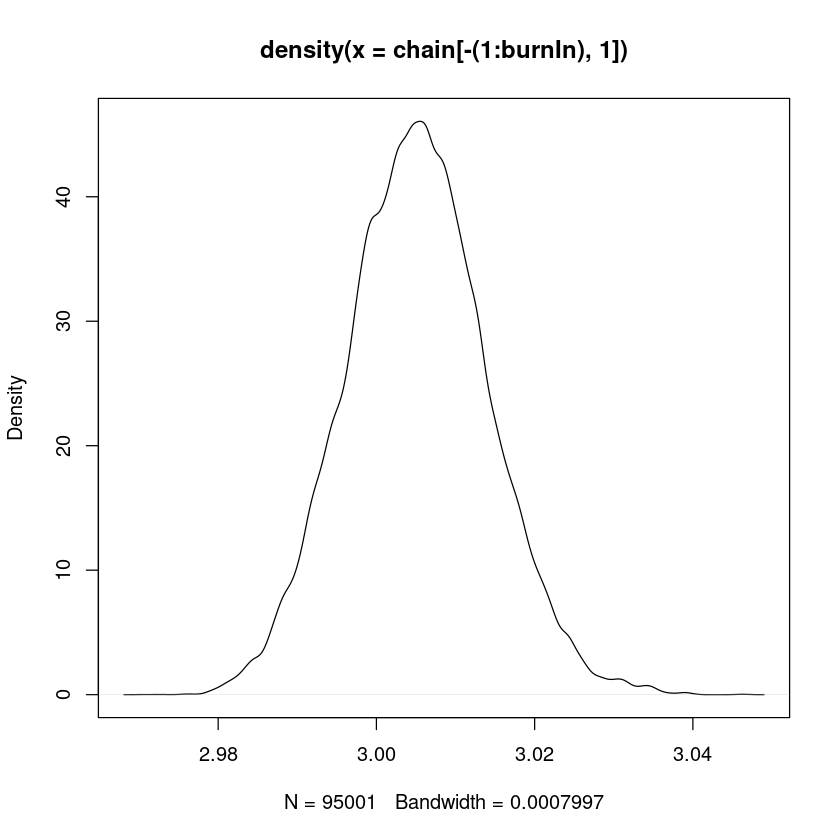

[1] 3.817031

[1] 0.4802766

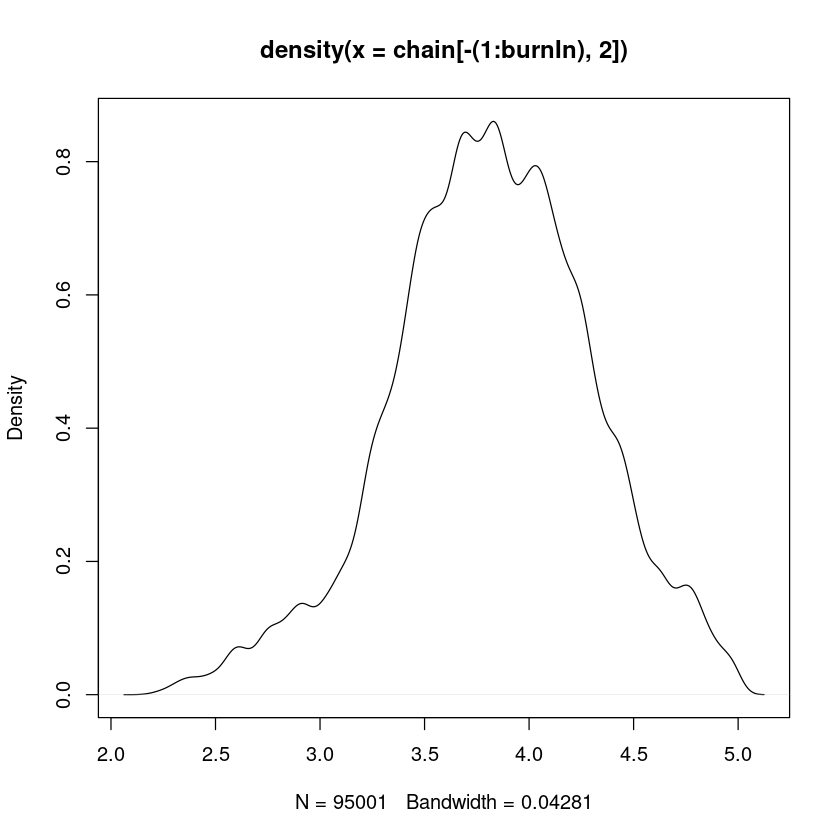

[1] 3.088205

[1] 0.2273078

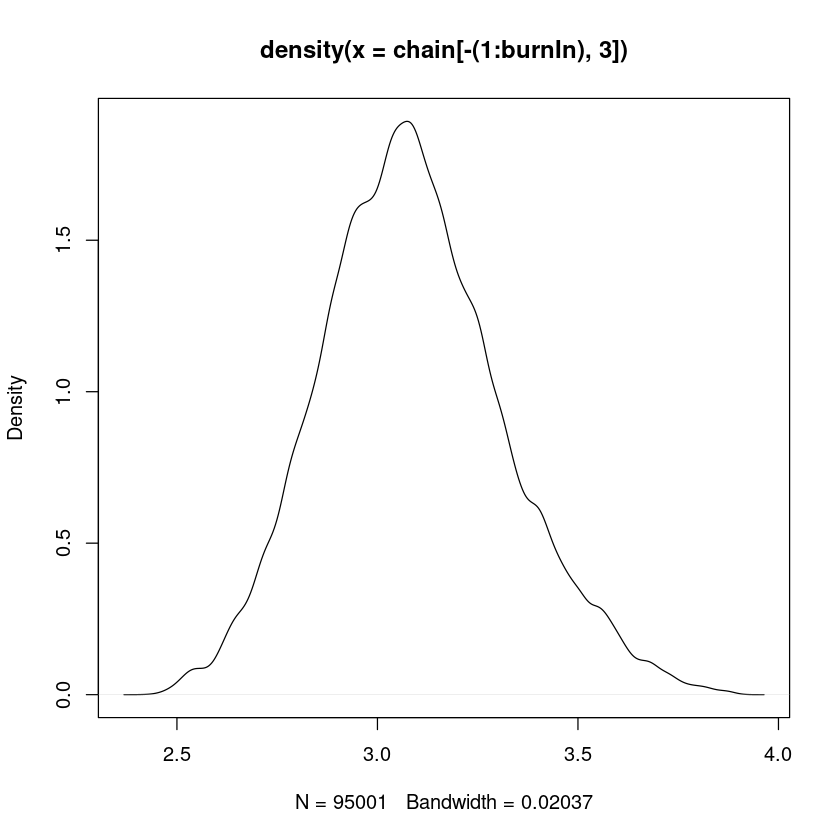

In [7]:
#jakie są rozkłady naszych parametrów 
par(bg = "white")
#a
plot(density(chain[-(1:burnIn),1]))
mean(chain[-(1:burnIn),1])
sd(chain[-(1:burnIn),1])

#b
plot(density(chain[-(1:burnIn),2]))
mean(chain[-(1:burnIn),2])
sd(chain[-(1:burnIn),2])

#sd
plot(density(chain[-(1:burnIn),3]))
mean(chain[-(1:burnIn),3])
sd(chain[-(1:burnIn),3])

In [ ]:
##Klimat DO NO RUN

# library(httr)
# library(jsonlite)
# library(tseries)
# library(segmented)

# # Ustawienie lokalizacji na angielski
# Sys.setlocale("LC_ALL","en_US.UTF-8")

# # Pobieranie danych pogodowych/klimatycznych dla Krakowa z API open-meteo
# r <- GET("https://archive-api.open-meteo.com/v1/archive?latitude=50.06&longitude=19.56&start_date=1950-01-01&end_date=2023-12-31&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,winddirection_10m_dominant&timezone=Europe%2FWarsaw",
#         Accept = "application/json")
# jsonRespText <- content(r, as = "text")
# aux <- fromJSON(jsonRespText)

# # Tworzenie ramki danych dla danych pogodowych Krakowa
# krakow <- data.frame(time = aux$daily$time,
#                    t_2m_max = aux$daily$temperature_2m_max,
#                    t_2m_min = aux$daily$temperature_2m_min,
#                    t_2m_mean = aux$daily$temperature_2m_mean,
#                    p_sum = aux$daily$precipitation_sum,
#                    p_h = aux$daily$precipitation_hours,
#                    w_d = aux$daily$winddirection_10m_dominant)

# krakow$time <- as.Date(krakow$time)

# summary(krakow)

In [ ]:
load("krakow.RDa")
summary(krakow)

In [1]:
#Wyodrębnienie dnia, miesiąca i roku z daty
day <- format(krakow$time, format = "%d")
month <- format(krakow$time, format = "%m")
year <- format(krakow$time, format = "%Y")

# Konwersja dnia, miesiąca i roku na liczbę
krakow$day <- as.numeric(day)
krakow$month <- as.numeric(month)
krakow$year <- as.numeric(year)


#policzmy średnie miesięczne dla opadów i temperatury średniej dla Krakowa 
t<-aggregate( t_2m_mean ~ month+ year , krakow , mean )
p<-aggregate( p_sum ~ month+ year , krakow , sum )

#R sortuje alfabetycznie dlatego musimy go przed tym powstrzymaŠ
krakow_m<-merge(t,p,by=c("year","month"),sort=FALSE)

summary(krakow_m)

SyntaxError: invalid syntax (2884479969.py, line 2)

In [ ]:
#weźmy lipiec w krakowie
test_k<-krakow_m[krakow_m$month==7,]

plot(test_k$year,test_k$t_2m_mean)

In [ ]:
#teraz coś czego jeszcze nie umiecie ale lepiej tak niż na oko :) 
# Wykonanie analizy segmentowanej
library(segmented)

# Tworzenie modelu liniowego
fit_lm = lm(t_2m_mean ~ year + 1, data = test_k) 
plot(test_k$year,test_k$t_2m_mean)
lines(test_k$year,predict(fit_lm))
 
# Wykonanie analizy segmentowanej dla jednego punktu
fit_segmented = segmented(fit_lm, seg.Z = ~ year, npsi = 1)  

# Tworzenie wykresu z analizą segmentową
plot(test_k$year,test_k$t_2m_mean)
plot(fit_segmented,add=TRUE)
lines.segmented(fit_segmented)
points.segmented(fit_segmented)

In [ ]:
#który to rok?
print(fit_segmented$psi)

In [ ]:
#zbadajmy teraz ten trend w konwencji MCMC

x<-test_k$year[test_k$year>=1978]
y<-test_k$t_2m_mean[test_k$year>=1978]

plot(x,y)

In [ ]:
#lepiej nam tak będzie zadawać priori
x<-seq(1,length(x))

summary(lm(y~x))

In [ ]:
prior <- function(param){
    a = param[1]
    b = param[2]
    sd = param[3]
    aprior = dunif(a, min=-1, max=1, log = T)
    bprior = dunif(b, min=0, max=20, log = T)
    sdprior = dunif(sd, min=0, max=30, log = T)
    return(aprior+bprior+sdprior)
}

proposalfunction <- function(param){
    return(rnorm(3,mean = param, sd= c(0.05,0.05,0.05)))
}
 
startvalue = c(0,16,1)

chain = run_metropolis_MCMC(startvalue, 10000)

burnIn = 5000
acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))
acceptance

In [ ]:
#a
plot(density(chain[-(1:burnIn),1]))
mean(chain[-(1:burnIn),1])
sd(chain[-(1:burnIn),1])

#b
plot(density(chain[-(1:burnIn),2]))
mean(chain[-(1:burnIn),2])
sd(chain[-(1:burnIn),2])

#sd
plot(density(chain[-(1:burnIn),3]))
mean(chain[-(1:burnIn),3])
sd(chain[-(1:burnIn),3])

#chain dla a
plot(chain[,1])

In [ ]:
#
#A jak było dawniej?
#

x<-test_k$year[test_k$year<=1978]
y<-test_k$t_2m_mean[test_k$year<=1978]

plot(x,y)

#lepiej nam tak będzie zadawać priori
x<-seq(1,length(x))

summary(lm(y~x))

In [ ]:
prior <- function(param){
    a = param[1]
    b = param[2]
    sd = param[3]
    aprior = dunif(a, min=-1, max=1, log = T)
    bprior = dunif(b, min=0, max=20, log = T)
    sdprior = dunif(sd, min=0, max=30, log = T)
    return(aprior+bprior+sdprior)
}

proposalfunction <- function(param){
    return(rnorm(3,mean = param, sd= c(0.05,0.05,0.05)))
}
 
startvalue = c(0,18,1)

chain = run_metropolis_MCMC(startvalue, 10000)

burnIn = 5000
acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))
acceptance

In [ ]:
#a
plot(density(chain[-(1:burnIn),1]))
mean(chain[-(1:burnIn),1])
sd(chain[-(1:burnIn),1])

#b
plot(density(chain[-(1:burnIn),2]))
mean(chain[-(1:burnIn),2])
sd(chain[-(1:burnIn),2])

#sd
plot(density(chain[-(1:burnIn),3]))
mean(chain[-(1:burnIn),3])
sd(chain[-(1:burnIn),3])

#chain dla a
plot(chain[,1])